In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Load dataset hasil pra-pemrosesan
df = pd.read_csv("/content/scrap price.csv")
df

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
# Pilih fitur dan target
X = df[['enginesize', 'horsepower', 'citympg', 'curbweight',]]
y = df['price']

In [ ]:
print("Fitur yang Digunakan (X):")
X

Fitur yang Digunakan (X):


,enginesize,horsepower,citympg,curbweight
0,130,111,21,2548
1,130,111,21,2548
2,152,154,19,2823
3,109,102,24,2337
4,136,115,18,2824
...,...,...,...,...
200,141,114,23,2952
201,141,160,19,3049
202,173,134,18,3012
203,145,106,26,3217


In [ ]:
print("Target yang Diprediksi (y):")
y

Target yang Diprediksi (y):


,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [ ]:
# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definisikan dan latih model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 5. Prediksi
y_pred = model.predict(X_test)

In [ ]:
# 6. Evaluasi
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.8156566298368468
RMSE: 3814.8141321939174


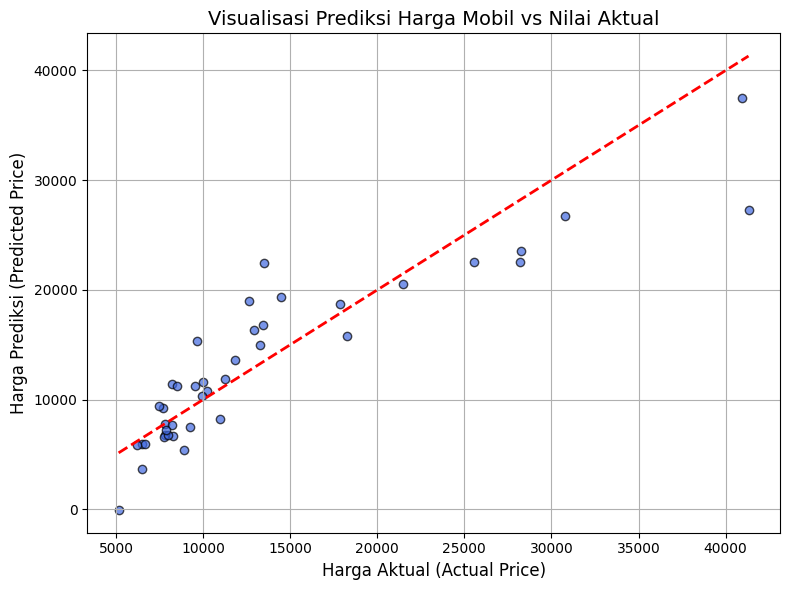

In [ ]:
# 7. Visualisasi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='royalblue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')

plt.xlabel("Harga Aktual (Actual Price)", fontsize=12)
plt.ylabel("Harga Prediksi (Predicted Price)", fontsize=12)
plt.title("Visualisasi Prediksi Harga Mobil vs Nilai Aktual", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()
